# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, make_scorer, ConfusionMatrixDisplay
from sklearn import tree



## Loading the dataset

In [2]:
loan_modelling = pd.read_csv('Loan_Modelling.csv') 
df = loan_modelling.copy()
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

Let us take a look at the data's shape, info, and some basic statistics.

In [3]:
print("Shape of the data:", df.shape)
print(df.info())
df.describe().T

Shape of the data: (5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Basic observations:

- There are 5000 rows and 14 columns.
- Every column are imported as numeric type. However, based on the data directory at the top, we know that at least some of them are categorical in nature. We will need to do some mapping later on.
- Family is an interesting attribute: it indicates the size of family, but it has to be whole number (e.g. family size can never be 1.5). Therefore, we probably need to treat it as categorical, and we will create a numeric column just in case.
- "Personal_Loan" is the target attribute, and it is a binary attribute (0 or 1). This is a classification problem.
- "ID" is the unique identifier, and it is not a feature. After we confirmed the fact that it's unique identifier, we can set it as the index later on.
- It does not seem to have any null record; the entire dataframe is filled with concrete value.

#### Basic Data Statistics:

- Age has a big spread (23-67), with a mean of 45.3 and a median of 45.0. It is slightly right skewed.
- Experience has ... wait, what? Minimum is -3? We need to investigate this further. Now first move to other columns.
- Income has a big spread (8-224), with a mean of 73.8 and a median of 64.0. It is heavily right skewed - meaning, there are some people with very high income that skewed the distribution.
- ZIPCode should actually be categorical (treat it as Post Code - as a string), so ignoring it for now.
- Family size is from 1 (single) to 4 (family of 4), with a mean of 2.4 and a median of 2.0.
- CCAvg is on a scale of $1000. Minimum is 0 (no credit card spending with AllLife Bank), maximum is 10 (spending $10k per month on credit card). Mean is 1.9, median is 1.5. It is right skewed.
- Education is a categorical attribute, so we will ignore this for now.
- Mortgage is on a scale of $1000. Minimum is 0 (no mortgage), maximum is 635 (a lot of mortgage). Mean is 56.5, median is 0.0. It is heavily right skewed. It seems that there is a heavy population without mortgage. We will create a new categorical column to represent this.
- The rest are categorical attributes, so we will ignore them for now.

Now comes the most important question: What is that negative value in the Experience column?

In [4]:
df[df['Experience'] < 0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


There are 52 records out of 5000 having this abnormal experience, roughly 1% of the total records. They are into the following pattern:

* All of them are young - between 23 and 29 years old (i.e. they are all younger than 30s)
* None of them have any CD accounts
* None of them accepted any previous personal loan offers
* Everything else seems normally distributed

There are a few ways to deal with this:

* Drop these records
* Replace them with the mean or median value
* Make the negative become positive

Since there are only 3 distinct negative values (-1, -2, -3), and all of them are with customers under 30 years old, we can safely assume that this is indeed a data entry error. Therefore, we will go with the third option. This is to be done in the next section.

#### Data Cleaning

First, let us fix the negative values in the Experience column.

In [5]:
df['Experience'] = df['Experience'].abs()

According to the data directory, there are some fields that are categorical in nature, but was imported as int64. We will convert them to categorical data type.

For "Education", we will convert it to categorical, and map the values to the actual meaning.

We also want to make the "Family" column to have a categorical version. This is because the number of family members is not a continuous variable, but a discrete one. We will make a new column called "Family_Size" to represent this.

In [6]:
for col in df[['ZIPCode', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']]:
    df[col] = pd.Categorical(df[col])

df['Education'] = df['Education'].map({1: 'Undergrad', 2: 'Graduate', 3: 'Professional'}).astype('category')

df['Family_Size'] = df['Family'].astype('category')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
 14  Family_Size         5000 non-null   category
dtypes: category(8), float64(1), int64(6)
m

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_Size
0,1,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0,4
1,2,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0,3
2,3,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0,1
4,5,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1,4


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

Let's start with looking at ID and see if it's the unique identifier.

In [7]:
df.ID.nunique()

5000

The ID column is indeed the unique identifier, so we will use it as the index.

In [8]:
df.set_index('ID', inplace=True)
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_Size
ID,,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0,4
2,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0,3
3,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0,1
4,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0,1
5,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1,4


Let us check the unique count of every numerical column.

In [13]:
print("Unique count of every numerical column:")
for col in df.select_dtypes(include=np.number):
    print(col, df[col].nunique())

Unique count of every numerical column:
Age 45
Experience 44
Income 162
Family 4
CCAvg 108
Mortgage 347


Let us plot the distribution of each numerical column. Let us use a series of subplots, with first column being the histogram and the second column being the boxplot.

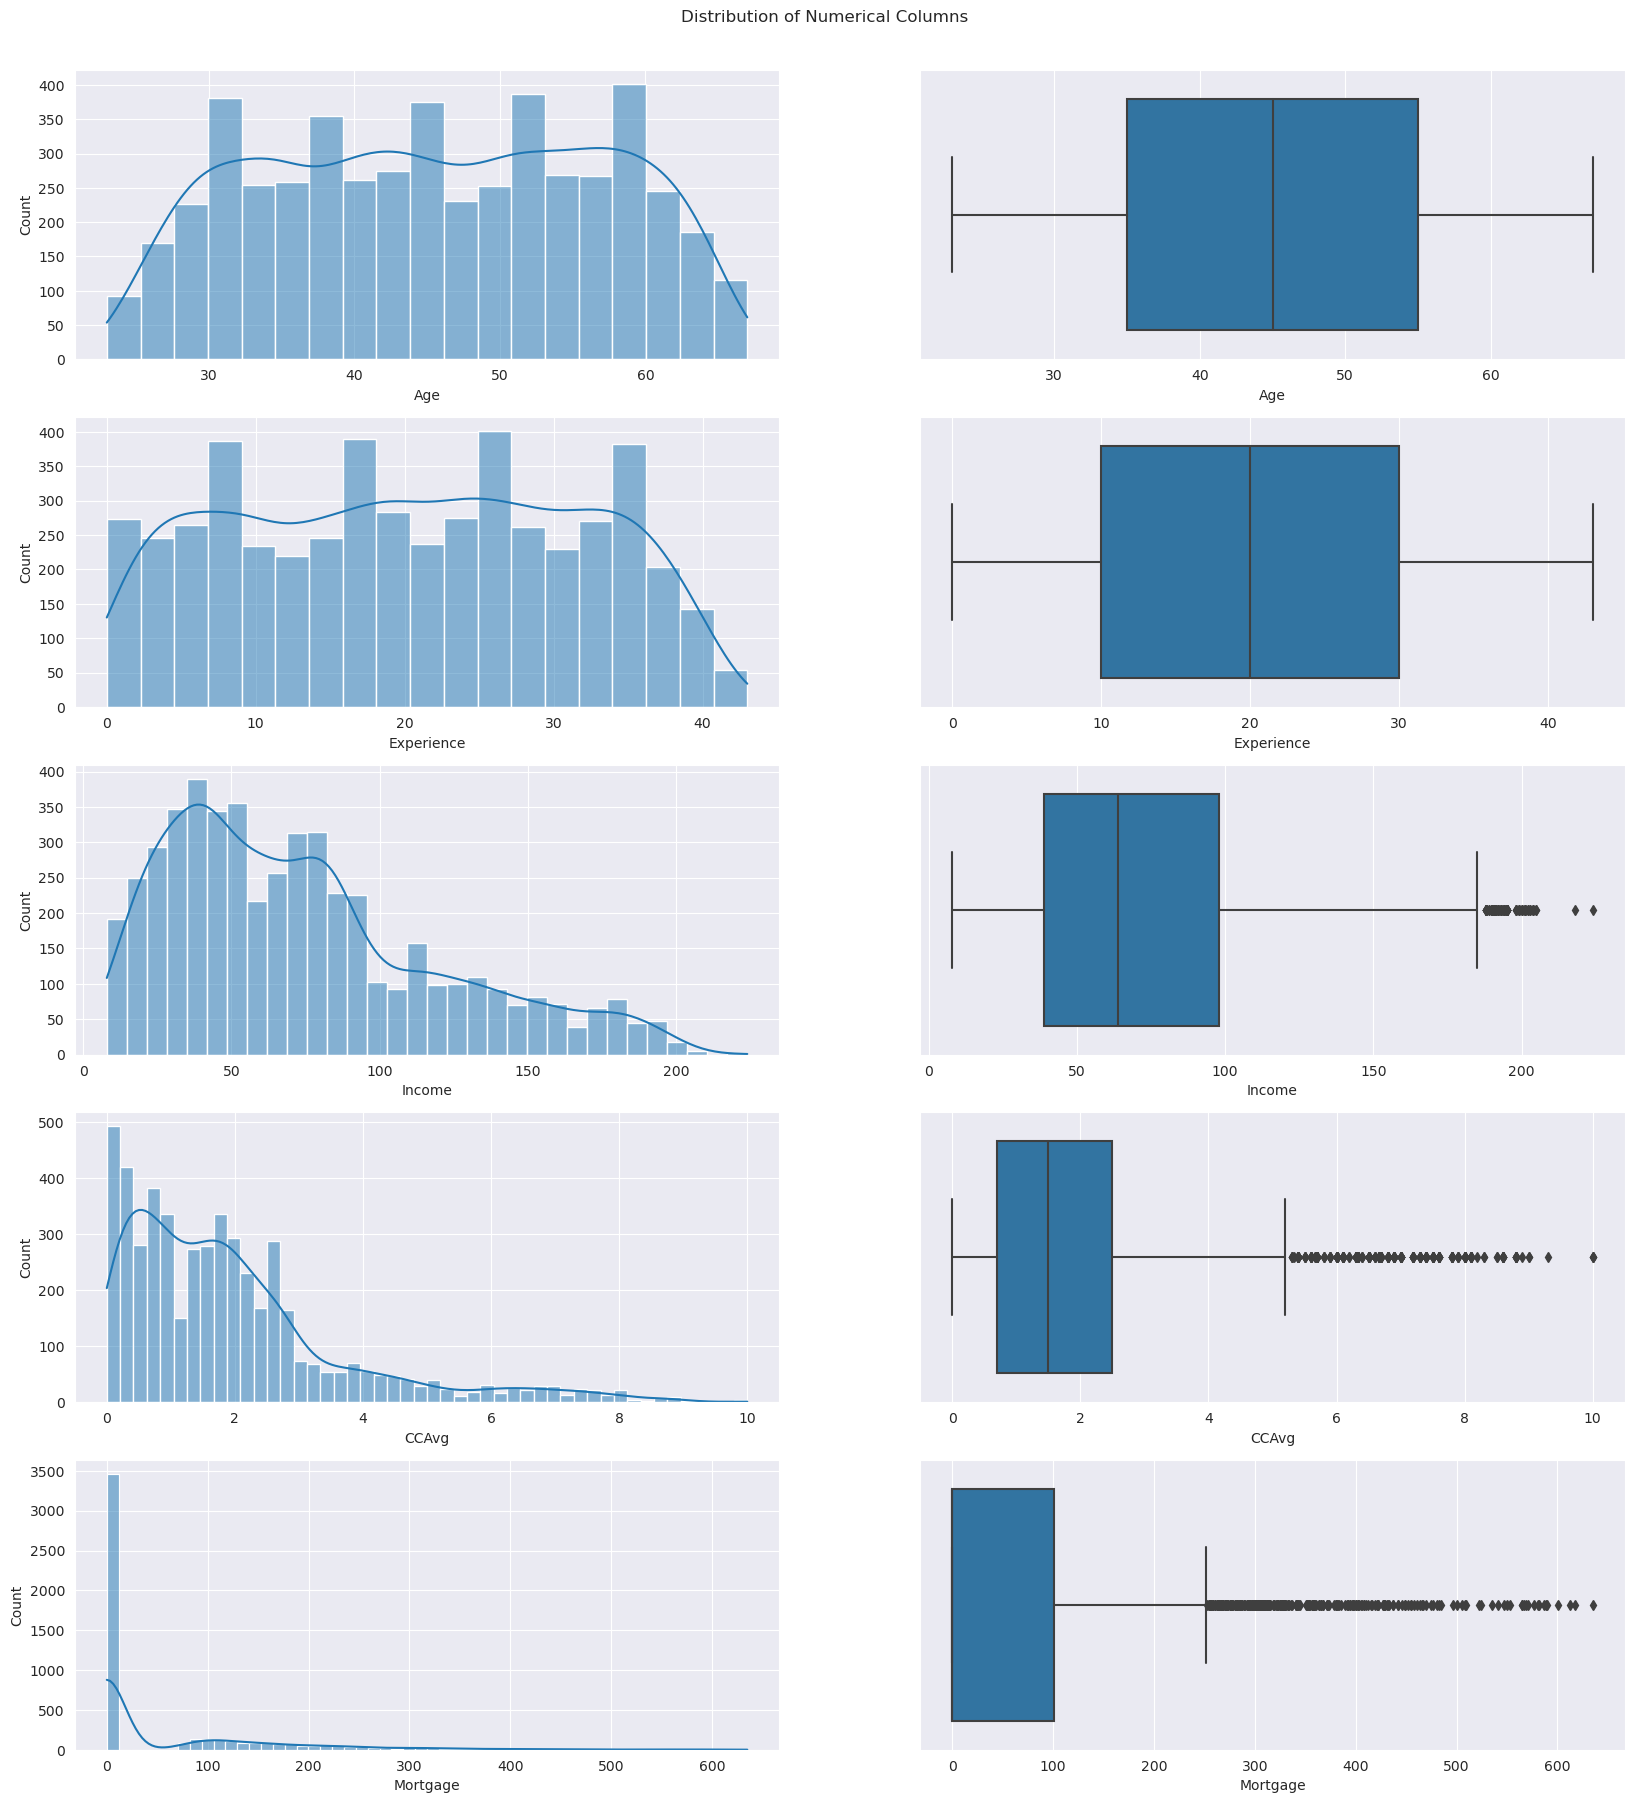

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Distribution of Numerical Columns')
sns.histplot(data=df, x='Age', kde=True, ax=axes[0, 0])
sns.boxplot(data=df, x='Age', ax=axes[0, 1])
sns.histplot(data=df, x='Experience', kde=True, ax=axes[1, 0])
sns.boxplot(data=df, x='Experience', ax=axes[1, 1])
sns.histplot(data=df, x='Income', kde=True, ax=axes[2, 0])
sns.boxplot(data=df, x='Income', ax=axes[2, 1])
sns.histplot(data=df, x='CCAvg', kde=True, ax=axes[3, 0])
sns.boxplot(data=df, x='CCAvg', ax=axes[3, 1])
sns.histplot(data=df, x='Mortgage', kde=True, ax=axes[4, 0])
sns.boxplot(data=df, x='Mortgage', ax=axes[4, 1])
plt.subplots_adjust(top=0.95)
plt.show()

**Observations**:

* Age and Experience are normally distributed, with a slight right skew.
* Income is right skewed, with a few outliers.
* CCAvg is also right skewed, with more outliers.
* Mortgage is heavily right skewed, with a lot of outliers.

The reason that Mortgage has so many outliners is that, most people do not have a mortgage. Only a few people have a mortgage, and those who do have a mortgage, have a large mortgage. This is why the distribution is so skewed.

Since there are so many customers without a mortgage, we will create a new categorical column to represent this.

In [11]:
# Let us 2 new categorical columns
# - "have_mortgage" (categorical, 0 as no, including all rows having Mortgage=0, and 1 as yes, including all rows having Mortgage > 0)

df['have_mortgage'] = df['Mortgage'].apply(lambda x: 0 if x == 0 else 1).astype('category')

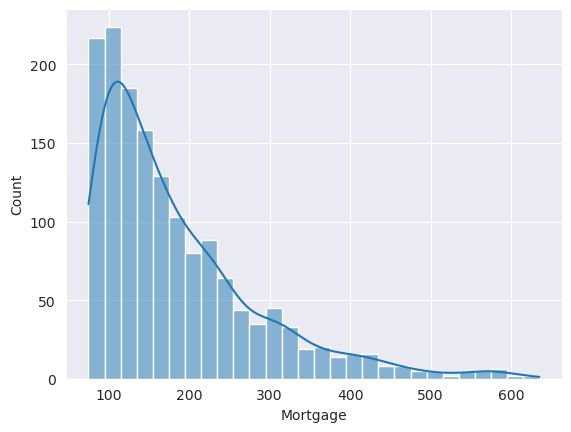

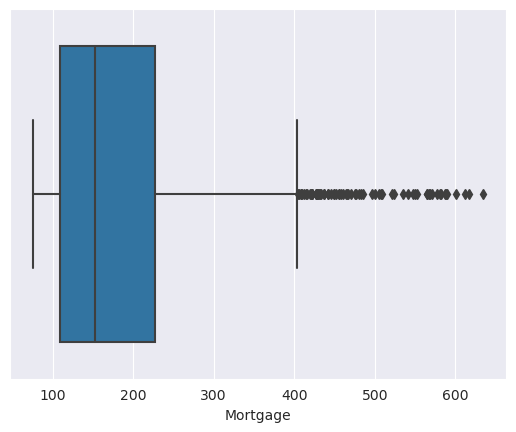

count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64

In [12]:
# Now, let's plot the mortgage amount distribution
nonzero_mortgage = df[df['Mortgage'] > 0]
sns.histplot(data=nonzero_mortgage, x='Mortgage', kde=True)
plt.show()
sns.boxplot(data=nonzero_mortgage, x='Mortgage')
plt.show()
nonzero_mortgage.Mortgage.describe()

Among customers that actually has a mortgage, the distribution is still heavily right skewed, with a lot of outliners, but not as severe as before.

Now let us check the unique count of every categorical column.

In [14]:
print("Unique count of every categorical column:")
for col in df.select_dtypes(include='category'):
    print(col, df[col].nunique())

Unique count of every categorical column:
ZIPCode 467
Education 3
Personal_Loan 2
Securities_Account 2
CD_Account 2
Online 2
CreditCard 2
Family_Size 4
have_mortgage 2


Let us look at the distribution of the categorical columns. We will use subplots again, showing 2 column, with each panel representing a different categorical column.

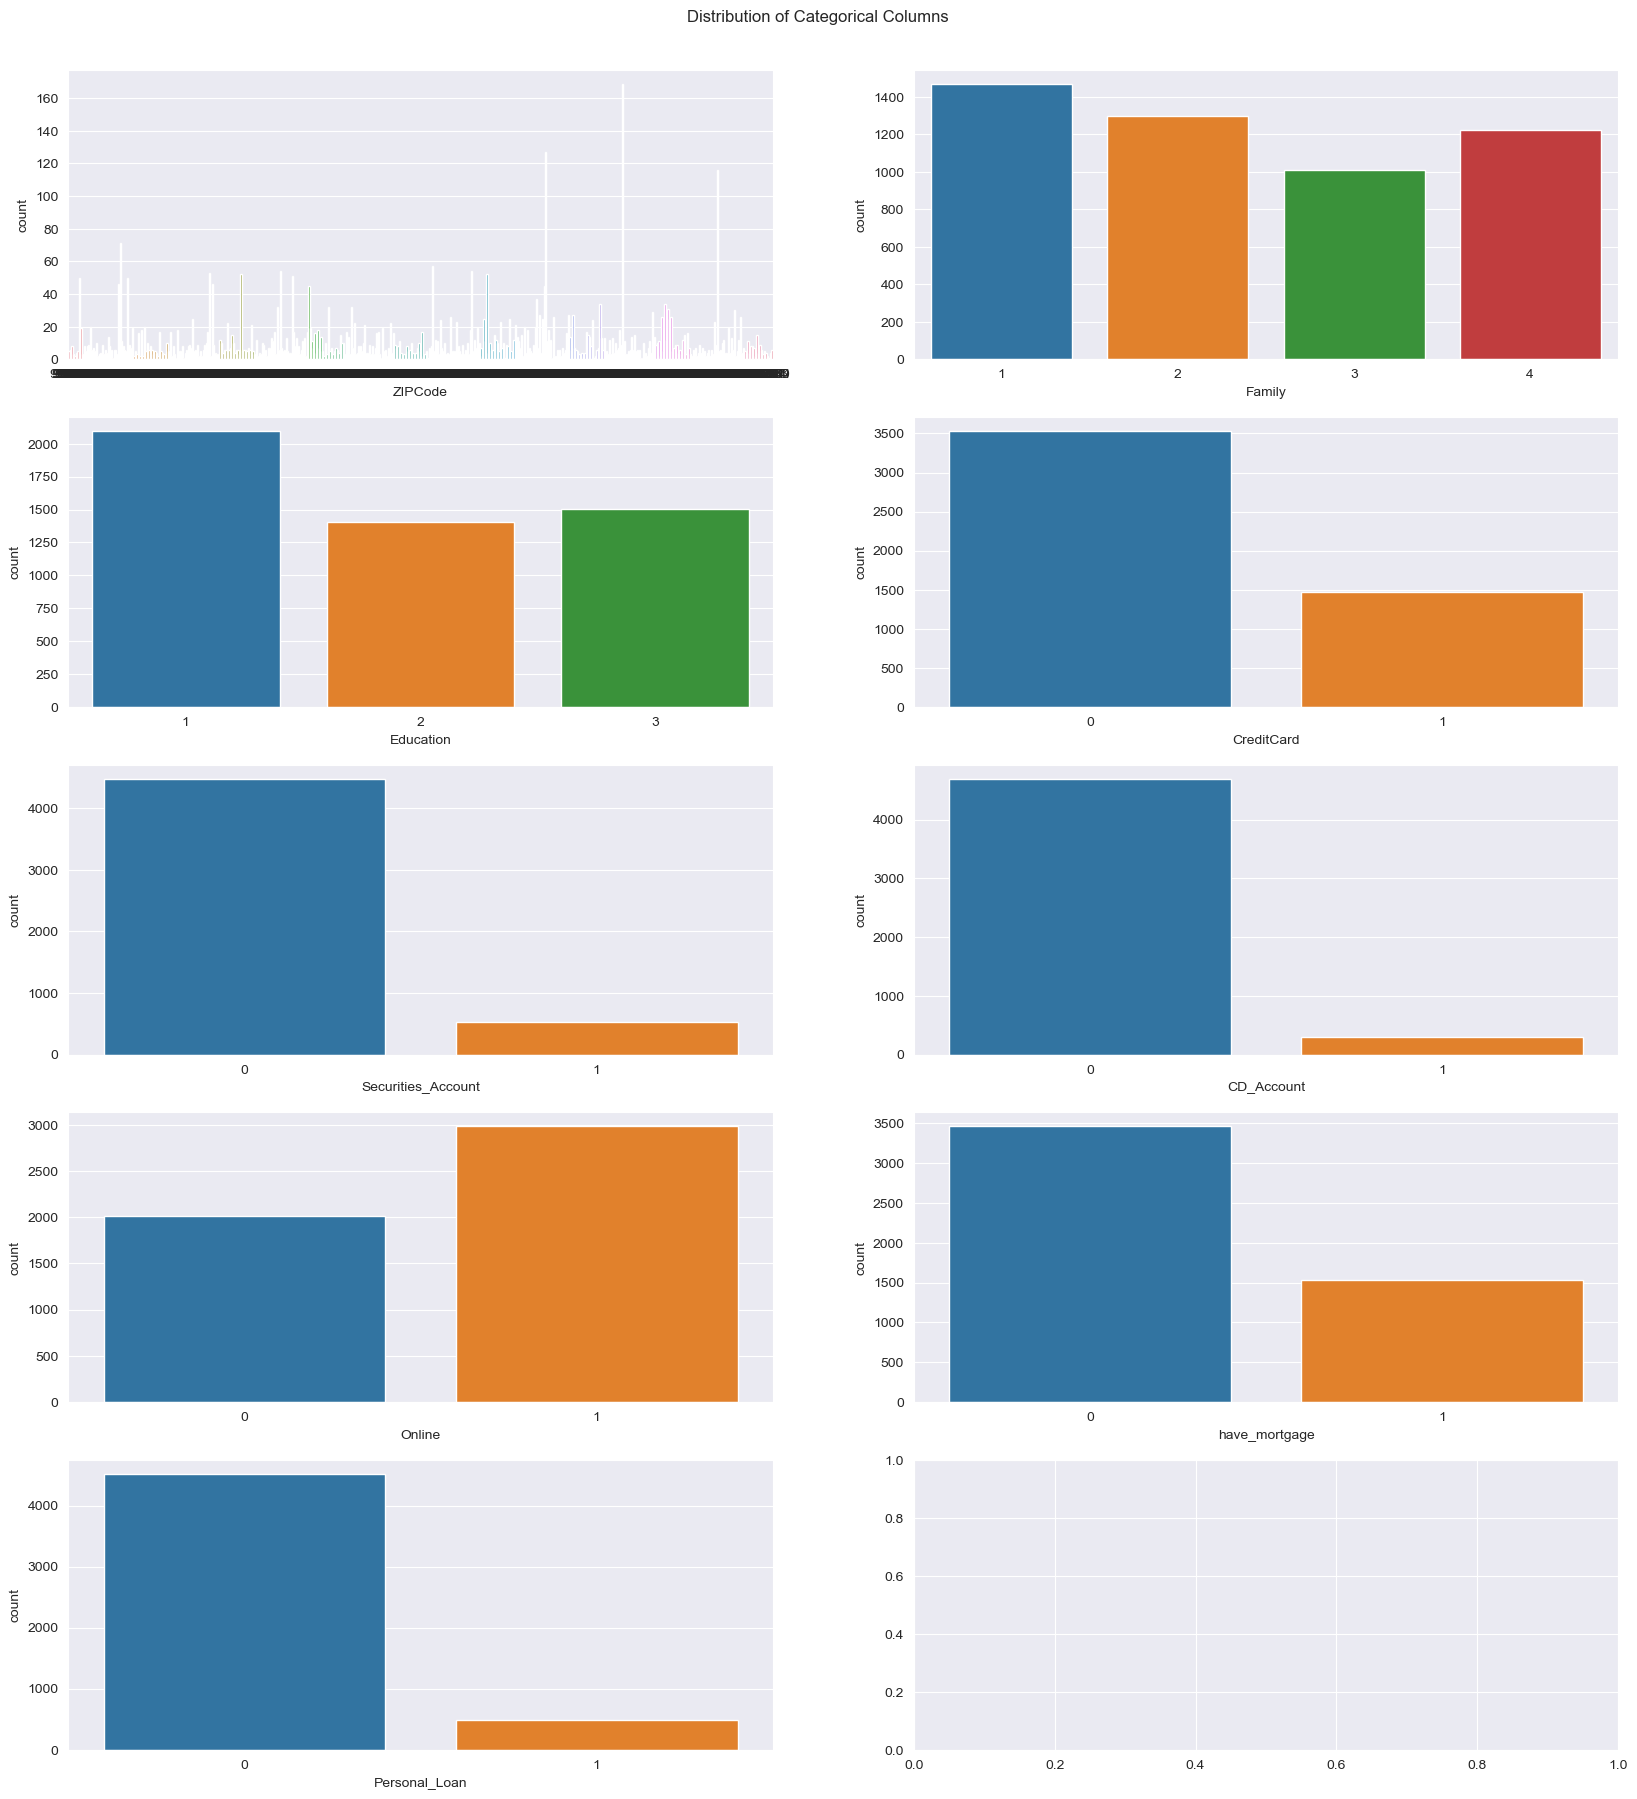

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Distribution of Categorical Columns')
sns.countplot(data=df, x='ZIPCode', ax=axes[0,0])
sns.countplot(data=df, x='Family', ax=axes[0,1])
sns.countplot(data=df, x='Education', ax=axes[1,0])
sns.countplot(data=df, x='CreditCard', ax=axes[1,1])
sns.countplot(data=df, x='Securities_Account', ax=axes[2,0])
sns.countplot(data=df, x='CD_Account', ax=axes[2,1])
sns.countplot(data=df, x='Online', ax=axes[3,0])
sns.countplot(data=df, x='have_mortgage', ax=axes[3,1])
sns.countplot(data=df, x='Personal_Loan', ax=axes[4,0])
plt.subplots_adjust(top=0.95)
plt.show()

**Observations**:

* ZIPCode has a large distribution, with some ZIPCode having a lot of customers. It means that the bank has more customers in certain ZIPCodes. However, until we look at multivariate analysis, we do not know how it would affect the personal loan choice. We probably also want to trim this column a bit down to reduce the number of categories.
* Family size is somewhat evenly distributed, with most customers having 1 or 4 family members.
* For Education, this bank has more customers with undergraduate degrees (but not overwhelmingly so).
* More customers use online banking than not. This probably have a little bit correlation with the age of the customers, we will verify that later.
* More customers have credit cards outside of AllLife bank than not.
* Most customers do not have a securities account or a CD account.
* As suspected, most customers do not have a mortgage.
* Most customers did not accept the personal loan offer in the previous campaign.

Now let's do some numerical analysis on categorical fields.

In [15]:
# find out the count of each category in each categorical column
for col in df[['ZIPCode', 'Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'have_mortgage']]:
    # print(df[col].value_counts())
    vc = df[col].value_counts()
    pers = df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'count': vc, '%': pers}))

         count      %
ZIPCode              
94720      169  3.38%
94305      127  2.54%
95616      116  2.32%
90095       71  1.42%
93106       57  1.14%
...        ...    ...
93077        1  0.02%
94965        1  0.02%
90068        1  0.02%
94970        1  0.02%
91024        1  0.02%

[467 rows x 2 columns]
        count       %
Family               
1        1472  29.44%
2        1296  25.92%
4        1222  24.44%
3        1010   20.2%
              count       %
Education                  
Undergrad      2096  41.92%
Professional   1501  30.02%
Graduate       1403  28.06%
               count      %
Personal_Loan              
0               4520  90.4%
1                480   9.6%
                    count       %
Securities_Account               
0                    4478  89.56%
1                     522  10.44%
            count       %
CD_Account               
0            4698  93.96%
1             302   6.04%
        count       %
Online               
1        2984  59.68%


Let us trim down ZIPCode a little bit. According to ZIP code format, the first 3 digits represent the sectional center facility (SCF) code. The next two digits represent the region or one of the postal circles. The last 3 digits represent the specific post office or delivery area. Therefore, we will trim the ZIPCode to the first 3 digits.

Before doing that, let's check the distribution of the first 3 digits of ZIPCode.

In [18]:
zip_3 = df['ZIPCode'].astype(str).str[:3]

zip_3.value_counts()

ZIPCode
900    375
921    279
950    267
945    264
941    257
943    257
947    251
920    248
940    242
913    222
926    182
956    162
902    161
917    150
958    141
931    134
939    102
951     96
946     89
928     81
949     75
911     71
927     62
923     60
930     58
925     49
907     45
934     43
919     41
957     40
906     38
935     36
904     35
955     32
916     29
960     29
910     29
905     28
953     26
959     19
908     19
954     19
933     18
937     18
948     17
924     17
944     13
952     13
914     13
922     10
936      8
912      7
942      7
966      6
961      5
918      3
903      2
Name: count, dtype: int64

This trims Zip codes from 467 to 57. It is still too many categories for a decision tree, so let us further trim it into just first 2 digits.

In [19]:
zip_2 = df['ZIPCode'].astype(str).str[:2]
zip_2.value_counts()

ZIPCode
94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: count, dtype: int64

Now we only have 7 categories, which is much more manageable. We will use this to actually trim the ZIPCode column.

In [20]:
df['ZIPCode'] = zip_2

#### Multivariate Analysis

First, let us look at the heatmap of the correlation matrix.

<Axes: >

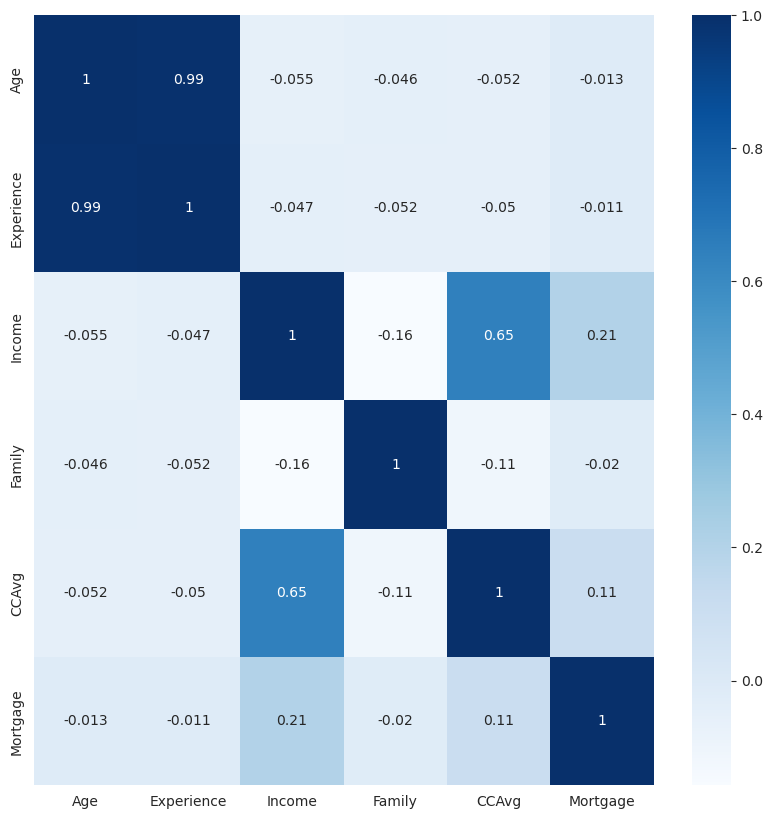

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

**Observations**:

- Age and Experience are highly correlated, which makes sense, because the more experience you have, the older you are.
- Income and CCAvg are also correlated (though not too strong), which makes sense, because the more you earn, the more you can spend; and, higher income people tend to have higher credit score, which means they can get higher credit limit.

Let us plot Income vs CCAvg to see the correlation.

<Axes: xlabel='Income', ylabel='CCAvg'>

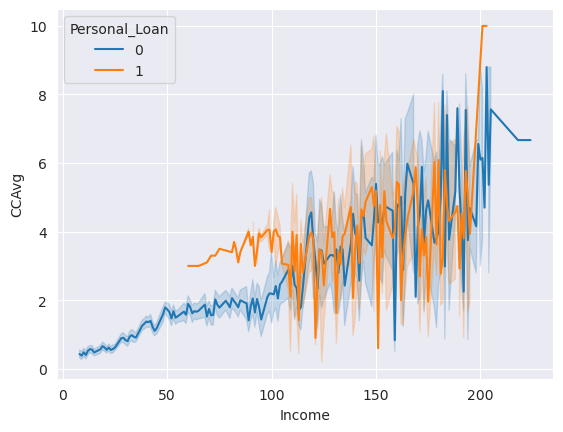

In [25]:
sns.lineplot(data=df, x='Income', y='CCAvg', hue='Personal_Loan')

It looks pretty consistent that, the more a customer earns, the more the credit card spending will end up. However, when going into high income territory, the variance of credit card spending is much higher. This is probably because, when you earn a lot, you can spend a lot, but you don't have to. Therefore, the credit card spending is also dependent on the customer's spending habit, rather than just their income.

In terms of splitting into whether a customer took a personal loan or not, it seems that, the higher the income, the more likely they will take a personal loan. Again, the individual customer's spending habit has an influence too.

Since we are already here, let us check *every* attribute (numerical and categorical, except ID) against the target attribute (Personal_Loan).

Let us first graph between every categorical attribute and the target attribute. We will use a stacked bar graph for each categorical attribute, with personal loan used as hue.

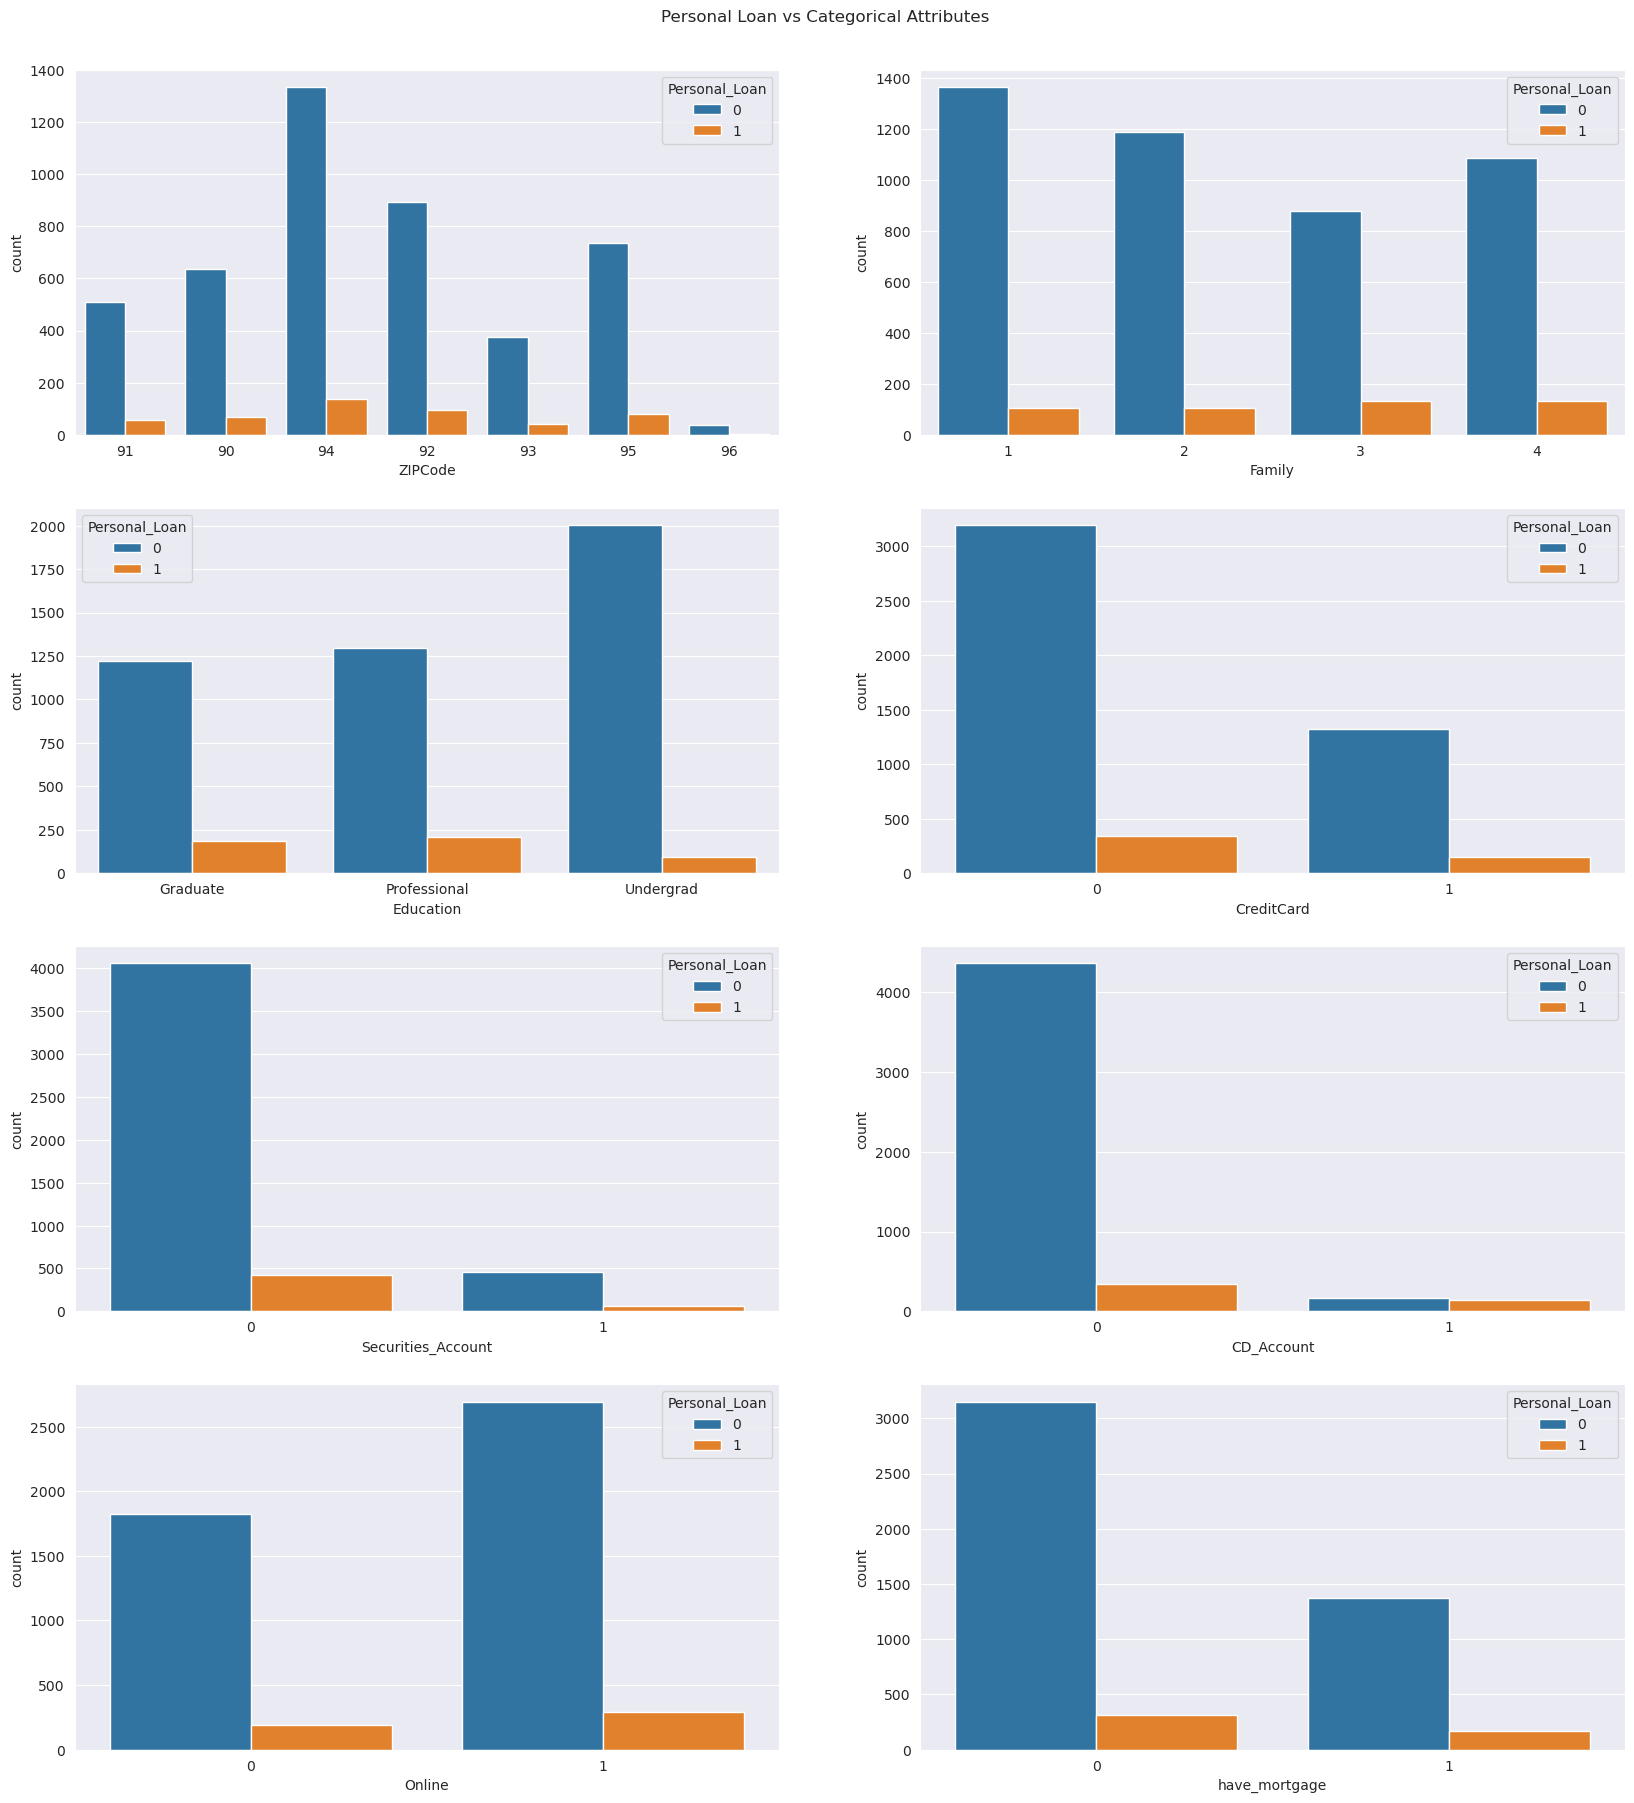

In [34]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('Personal Loan vs Categorical Attributes')
sns.countplot(data=df, x='ZIPCode', hue='Personal_Loan', ax=axes[0,0])
sns.countplot(data=df, x='Family', hue='Personal_Loan', ax=axes[0,1])
sns.countplot(data=df, x='Education', hue='Personal_Loan', ax=axes[1,0])
sns.countplot(data=df, x='CreditCard', hue='Personal_Loan', ax=axes[1,1])
sns.countplot(data=df, x='Securities_Account', hue='Personal_Loan', ax=axes[2,0])
sns.countplot(data=df, x='CD_Account', hue='Personal_Loan', ax=axes[2,1])
sns.countplot(data=df, x='Online', hue='Personal_Loan', ax=axes[3,0])
sns.countplot(data=df, x='have_mortgage', hue='Personal_Loan', ax=axes[3,1])
plt.subplots_adjust(top=0.95)
plt.show()

**Observations**:

- ZIPCode: There are some ZIPCode that have a higher chance of taking a personal loan, but it is not a strong correlation. Plus, Zip code with only 2 digits can have very disjunctive areas, so it is not a good indicator.
- Family: There are more customers with family size 1 or 2, yet the actual number of customers taking the loan offer is about the same as family size 3 or 4. That means, family size 1 is the least likely to take a loan, while family size = 3 or 4 is the most likely to take a loan.
- Credit card, securities account, have mortgage and online: for all these, the number of taking a loan or not seems proportional to the number of customers having that attribute. Therefore, these attributes are not good indicators.
- CD Account: those having it have an almost 50% chance of taking a loan, meaning this is a good indicator.
- Education: those with graduate or professional degree are more likely to take a loan, while those with undergrad degree are less likely to take a loan. This is a good indicator. 

Now let us take a look at the relationships between Personal Loan and all numerical attributes (sans ID). We will use two histplot and a boxplot for each numerical attribute.

- For the first histplot, we will use the numerical attribute as x, but showing data only with Personal_Loan = 0 (no loan). This will show the distribution of the attribute for customers who did not take the loan. Color will be blue.
- For the second histplot, we will use the numerical attribute as x, but showing data only with Personal_Loan = 1 (took the loan). This will show the distribution of the attribute for customers who took the loan. Color will be orange.
- For the boxplot, we will use the numerical attribute as x, and the y axis will be Personal Loan.

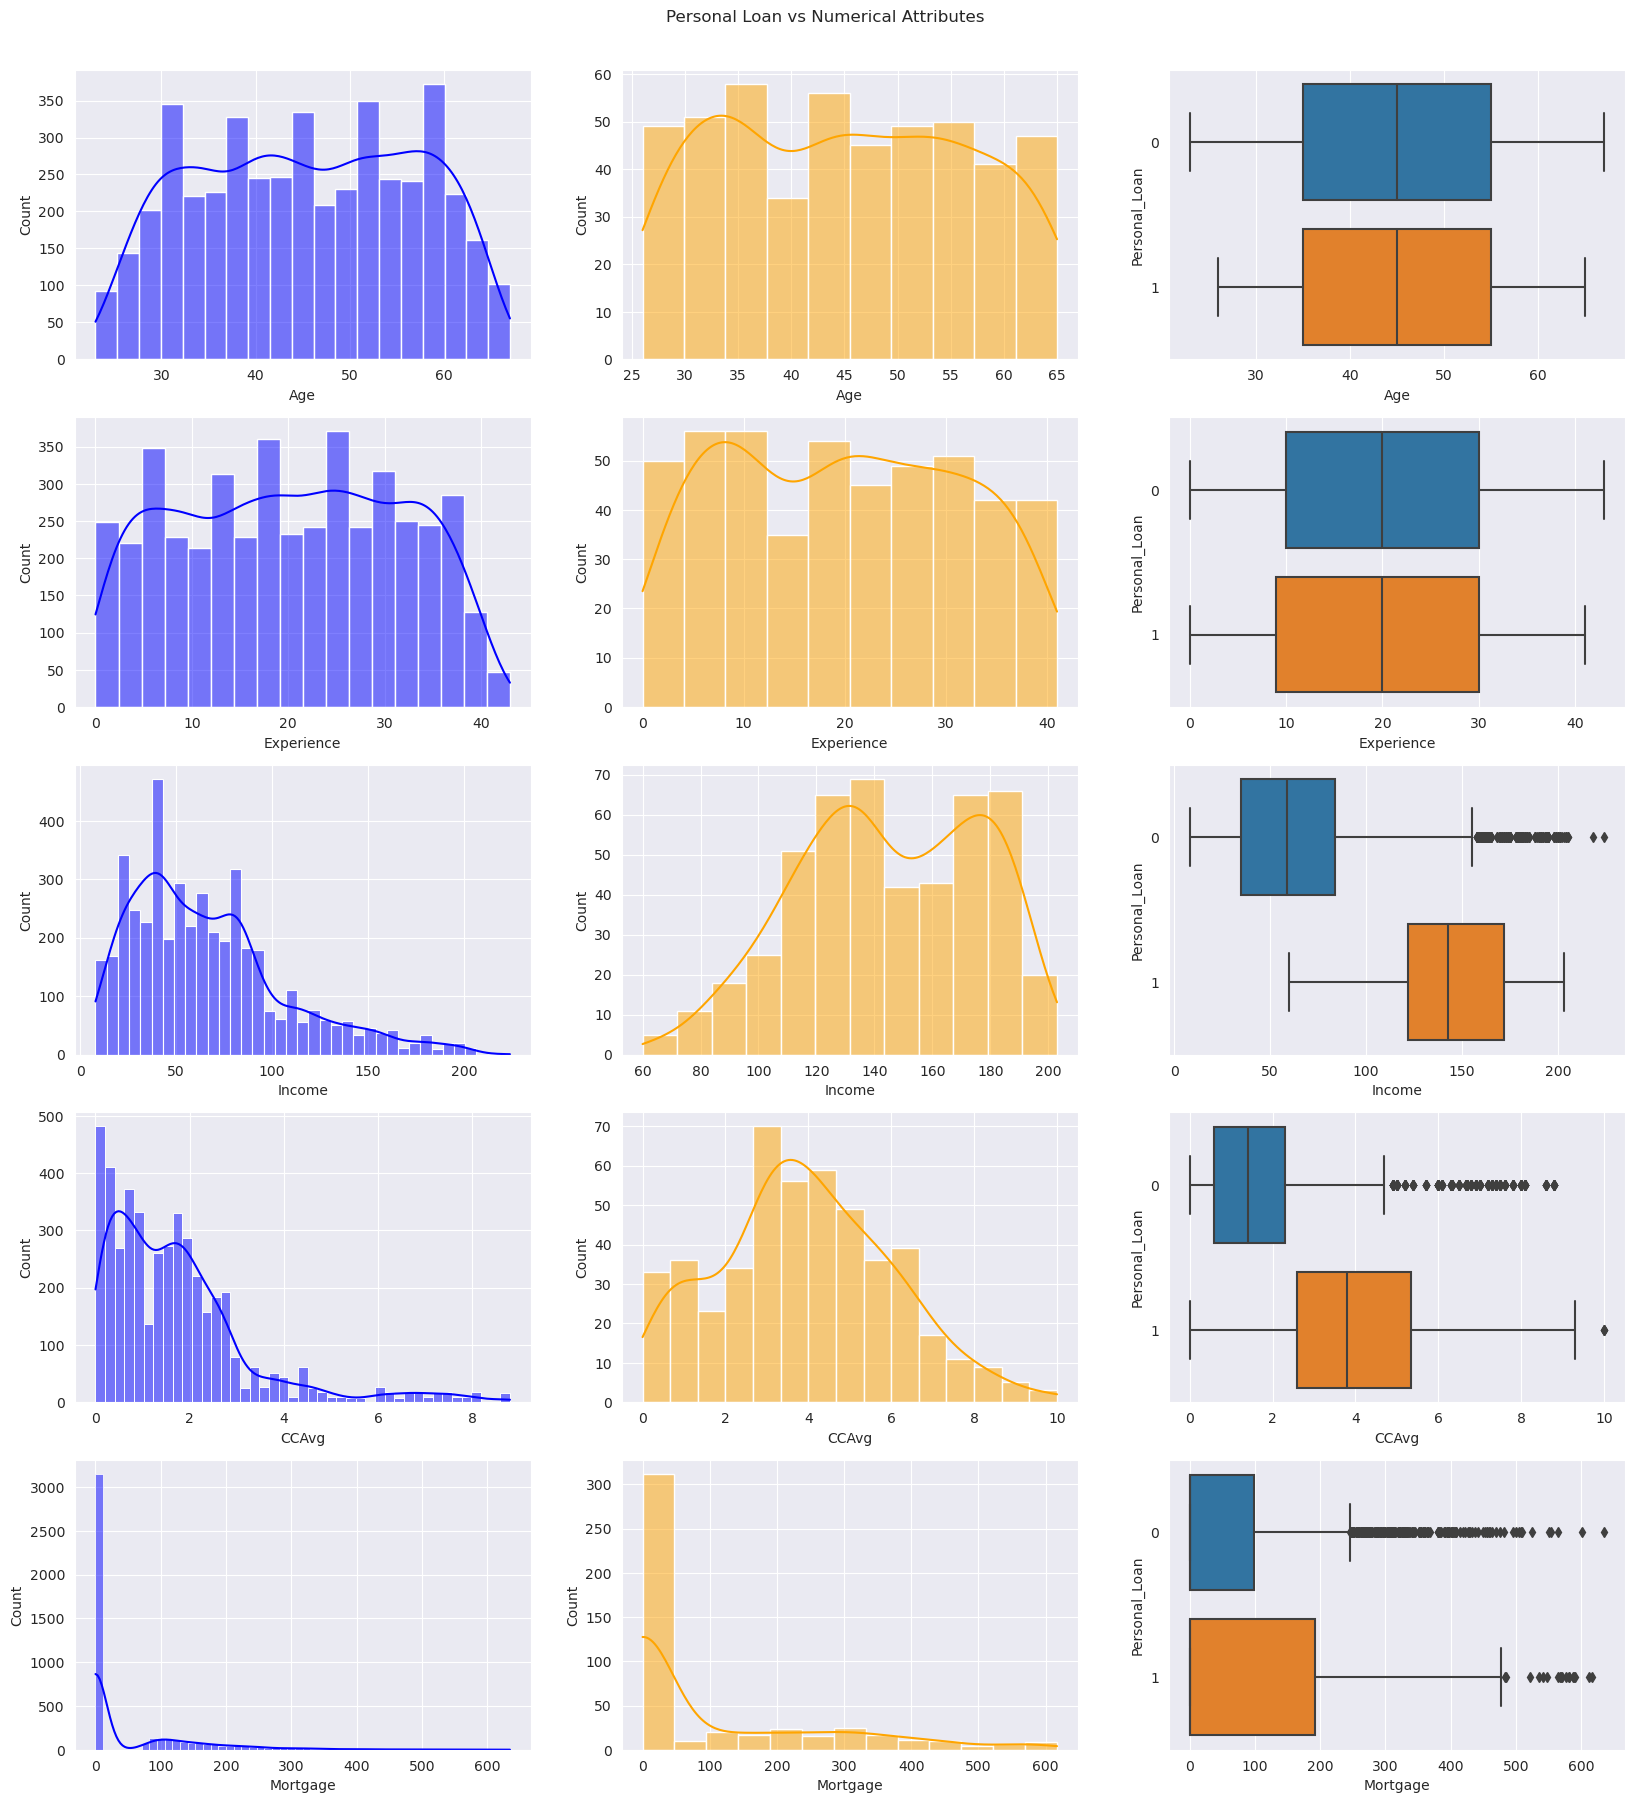

In [37]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
fig.suptitle('Personal Loan vs Numerical Attributes')
sns.histplot(data=df[df['Personal_Loan'] == 0], x='Age', kde=True, ax=axes[0, 0], color='blue')
sns.histplot(data=df[df['Personal_Loan'] == 1], x='Age', kde=True, ax=axes[0, 1], color='orange')
sns.boxplot(data=df, x='Age', y='Personal_Loan', ax=axes[0, 2])
sns.histplot(data=df[df['Personal_Loan'] == 0], x='Experience', kde=True, ax=axes[1, 0], color='blue')
sns.histplot(data=df[df['Personal_Loan'] == 1], x='Experience', kde=True, ax=axes[1, 1], color='orange')
sns.boxplot(data=df, x='Experience', y='Personal_Loan', ax=axes[1, 2])
sns.histplot(data=df[df['Personal_Loan'] == 0], x='Income', kde=True, ax=axes[2, 0], color='blue')
sns.histplot(data=df[df['Personal_Loan'] == 1], x='Income', kde=True, ax=axes[2, 1], color='orange')
sns.boxplot(data=df, x='Income', y='Personal_Loan', ax=axes[2, 2])
sns.histplot(data=df[df['Personal_Loan'] == 0], x='CCAvg', kde=True, ax=axes[3, 0], color='blue')
sns.histplot(data=df[df['Personal_Loan'] == 1], x='CCAvg', kde=True, ax=axes[3, 1], color='orange')
sns.boxplot(data=df, x='CCAvg', y='Personal_Loan', ax=axes[3, 2])
sns.histplot(data=df[df['Personal_Loan'] == 0], x='Mortgage', kde=True, ax=axes[4, 0], color='blue')
sns.histplot(data=df[df['Personal_Loan'] == 1], x='Mortgage', kde=True, ax=axes[4, 1], color='orange')
sns.boxplot(data=df, x='Mortgage', y='Personal_Loan', ax=axes[4, 2])
plt.subplots_adjust(top=0.95)
plt.show()

**Observations**:

- Age and Experience: the distribution of age and experience is similar for both customers who took the loan and those who did not. However, the median age and experience of those who took the loan is higher than those who did not. This means that, older customers are more likely to take the loan.
- Income: it is highly indicative that, the higher the income, the more likely the customer will take the loan. This is consistent with the previous observation that, the higher the income, the more likely the customer will spend more on credit card.
- CCAvg: looks like when CCAvg is around 4k, the customer is more likely to take the loan.
- Mortgage: the distribution of mortgage is similar for both customers who took the loan and those who did not.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [29]:
df[df.Mortgage > 0].Mortgage.describe()

count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64

Ans:
1. For mortgages, referring to above, there are close to 70% of customers do not have a mortgage. The rest of the customers have a mortgage, and the distribution is heavily right skewed, with a lot of outliers. The minimum mortgage amount is 75k. Interestingly, if we use the original Mortgage column unmodified, the stats would be much different, because it would include a bunch of 0 (no mortgage), and a big gap between 0 and 75k. This is why we created the "have_mortgage" column, to better represent the distribution of mortgage amount.

In [30]:
df.CreditCard.value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

Ans 2: 1470 customers (29.4%) have credit cards outside of AllLife bank.

Ans 3: It looks like Education, Income, CCAvg, Family size and CD Account have a strong correlation with the target attribute (personal loan).

Ans 4: It looks like customers between 30 and 55 years old are more likely to take a loan. Customers who are younger may still be living in a more affordable standard (plus they may already have student loan), and customers older than 55 may perhaps be thinking about retirement and not wanting to take on more debt.

Ans 5: Customers with graduate or professional degree are more likely to take a loan, while those with undergrad degree are less likely to take a loan. Perhaps the reason is that, the higher education they are, the more the customers have higher income and more expensive lifestyle (and perhaps more need too, such as building a family). At the same time, they may also feel less threatened by taking on more debt and feeling more confident in paying it off.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

We have dealt with a healthy chunk of data cleaning at the above steps already. Now let us do the rest of the data preprocessing.

The first thing we should do is - to remove the have_mortgage column. This column was good for plotting and data analysis, but it is not needed for modeling.

In [38]:
df.drop(columns='have_mortgage', inplace=True)

Now let us do one-hot encoding for all needed categorical columns.

For categorical columns that are only 0 and 1 (including CreditCard, CD_Account, Securities_Account, and Online), we will just leave them as is, since it is already in the form we want.

For Family, we can actually use it as is. Therefore, we can drop Family_Size column.

For Education and Zip Code, we will use one-hot encoding.

In [39]:
df = pd.get_dummies(df, columns=['Education', 'ZIPCode'], drop_first=True)
df.drop(columns='Family_Size', inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Professional,Education_Undergrad,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96
ID,,,,,,,,,,,,,,,,,,,
1,25,1,49,4,1.6,0,0,1,0,0,0,False,True,True,False,False,False,False,False
2,45,19,34,3,1.5,0,0,1,0,0,0,False,True,False,False,False,False,False,False
3,39,15,11,1,1.0,0,0,0,0,0,0,False,True,False,False,False,True,False,False
4,35,9,100,1,2.7,0,0,0,0,0,0,False,False,False,False,False,True,False,False
5,35,8,45,4,1.0,0,0,0,0,0,1,False,False,True,False,False,False,False,False


Now, let us split the data to be independent variables and dependent variable, as well as splitting out training and testing data.

(We will not include Experience in this model building, because it is super correlated with Age - meaning, using Age will probably be enough to perform classification).

In [42]:
X = df.drop(columns=['Personal_Loan', 'Experience'], axis=1)
Y = df['Personal_Loan']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## Model Building

### Model Evaluation Criterion

In a classification problem, we might have two kinds of errors:

* False Positive: when the model predicts a positive result, but the actual result is negative.
* False Negative: when the model predicts a negative result, but the actual result is positive.

In business terms for AllLife Bank:

* False Positive: when the model predicts that a customer will take a loan, but the customer actually does not take a loan. This is a waste of resources for the bank.
* False Negative: when the model predicts that a customer will not take a loan, but the customer actually takes a loan. This is a missed opportunity for the bank.

Since we are talking about customers purchasing the loan and not necessarily about the bank giving out the loan, nor about whether the customers can repay the loan, we will focus on the False Negative error. Therefore, we will use Recall as the evaluation metric.

### Model Building

(I have to confess: the functions in the low code version are very handy. I will copy them, but with the Confusion Matrix display using ConfusionMatrixDisplay class instead of using heatmap).

In [43]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [62]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    ConfusionMatrixDisplay.from_estimator(model, predictors, target, normalize='all', cmap='Blues', display_labels=model.classes_)


#### Decision Tree

Let us first build a decision tree model (without pre- or post-pruning), and see how it performs.

In [45]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

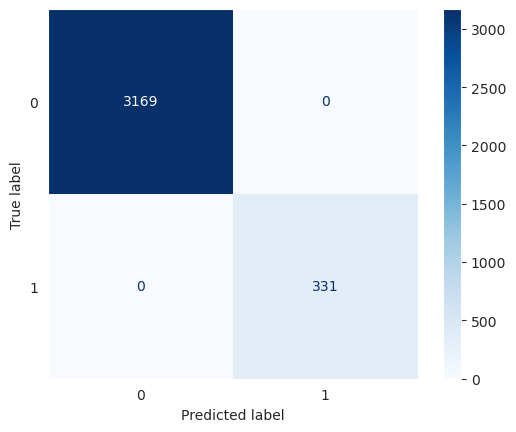

In [71]:
# let's display the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_train, Y_train, cmap='Blues')
plt.grid(False)

Let us check the performance of the model against training data

In [125]:
score_train_pre = model_performance_classification_sklearn(dt_model, X_train, Y_train)
score_train_pre

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Recall,Precision,F1
0,0.905429,0.0,0.0,0.0


Let us show the decision tree in graphical format

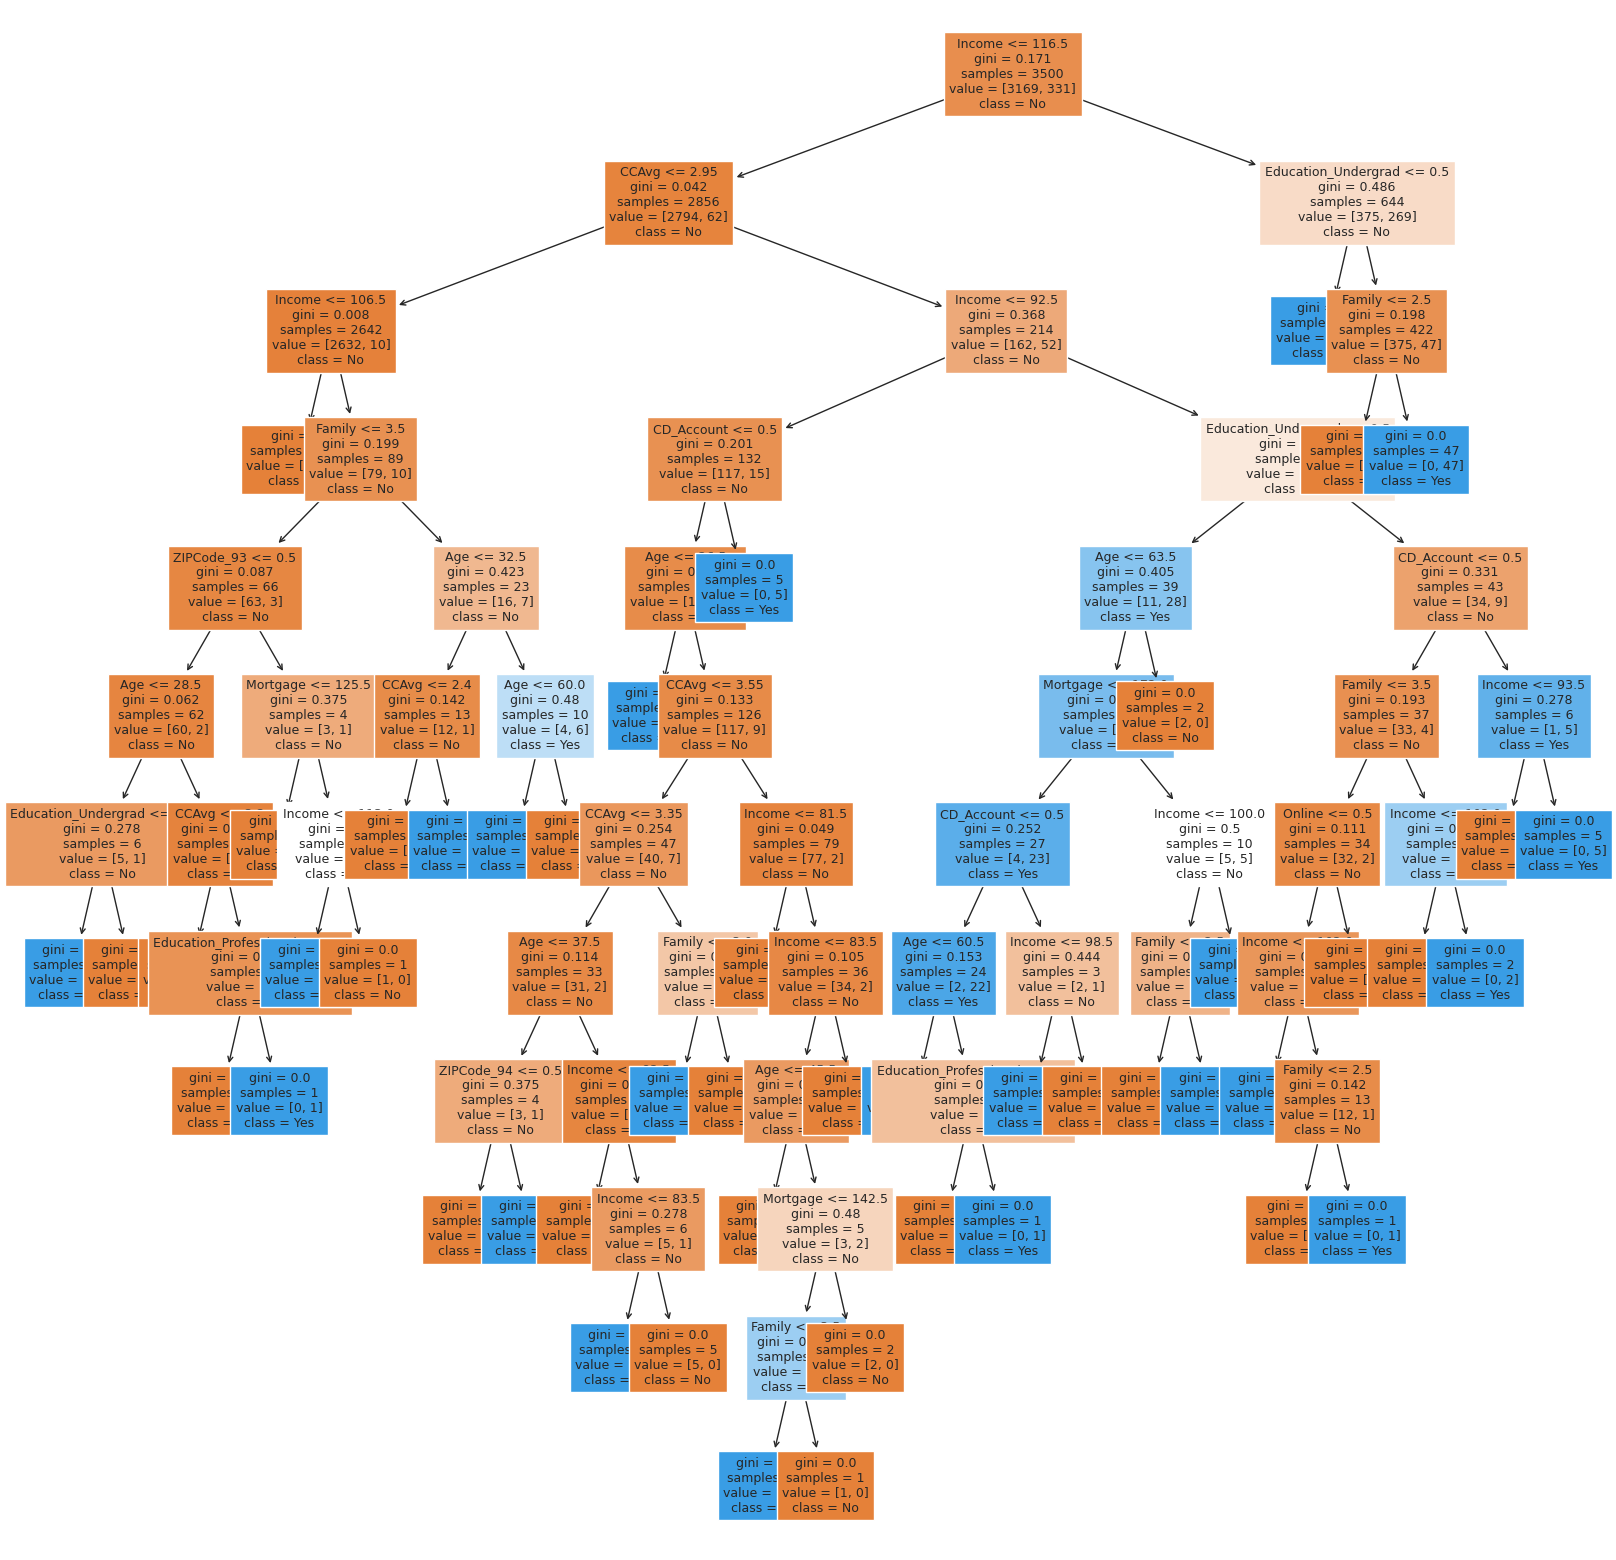

In [78]:
plt.figure(figsize=(20, 20))
tree.plot_tree(dt_model, feature_names=list(X_train.columns), class_names=['No', 'Yes'], filled=True, fontsize=9)
plt.show()

And let us print out the decision tree in textual format.

In [79]:
text_representation = tree.export_text(dt_model, feature_names=list(X_train.columns))
print(text_representation)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Mortgage <= 125.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Mortgage >  125.50
|   |   |

In [83]:
# We can show the importance of each parameter in making the decision. DecisionTreeClassifier has a built-in attribute for that, we will show it here.

print(pd.DataFrame(dt_model.feature_importances_, columns=["Importance"], index=X_train.columns).sort_values(by="Importance", ascending=False))

                        Importance
Education_Undergrad       0.403732
Income                    0.317094
Family                    0.167368
CCAvg                     0.045621
Age                       0.026044
CD_Account                0.025711
Mortgage                  0.005628
Education_Professional    0.005144
ZIPCode_94                0.002503
ZIPCode_93                0.000594
Online                    0.000561
ZIPCode_95                0.000000
CreditCard                0.000000
ZIPCode_92                0.000000
ZIPCode_91                0.000000
Securities_Account        0.000000
ZIPCode_96                0.000000


Observations:

From the above importance list, Education, Income, Family, CCAvg, Age and CD_Account are the most important features (the rest are all below 1%). This is consistent with our previous analysis.

#### Check model on test data

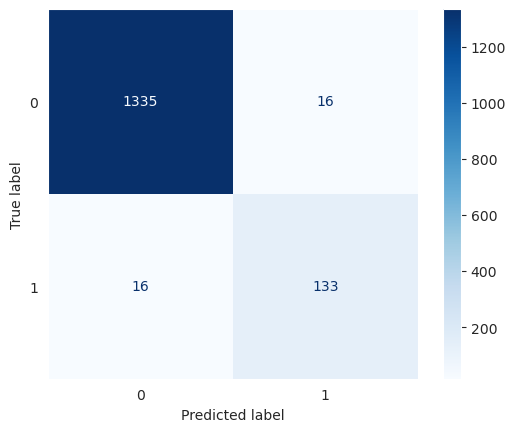

In [85]:
# Let's display the confusion matrix, but this time using test data
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, Y_test, cmap='Blues')
plt.grid(False)

In [86]:
# Let's check the performance of the model against test data
model_performance_classification_sklearn(dt_model, X_test, Y_test)

,Accuracy,Recall,Precision,F1
0,0.978667,0.892617,0.892617,0.892617


We have accuracy of 97.87%, and Recall as 89.26%. Just looking at the recall score itself, it looks pretty good. Let us see if there is any way to improve the recall score.

### Model Performance Improvement

#### Decision Tree with pre-pruning

Let us try to pre-prune the decision tree, and see if it improves the recall score. To do that, let us use GridSearchCV to find the best parameters.

In [88]:
# Let us first define the parameters to be used in GridSearchCV
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# make a new decision tree model
dt_model_pre = DecisionTreeClassifier(random_state=1)

# Let us define the GridSearchCV object
dt_model_grid = GridSearchCV(dt_model_pre, parameters, cv=5, scoring="recall", n_jobs=-1)
dt_model_grid.fit(X_train, Y_train)

# Let us print out the best parameters
dt_model_pre = dt_model_grid.best_estimator_

dt_model_pre.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

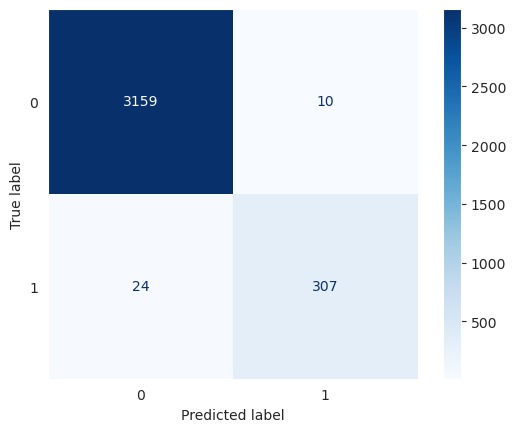

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


In [90]:
# use the best estimator we have used to re-do the exercise we have been doing, on training data first:

ConfusionMatrixDisplay.from_estimator(dt_model_pre, X_train, Y_train, cmap='Blues')
plt.grid(False)
plt.show()

model_performance_classification_sklearn(dt_model_pre, X_train, Y_train)

Recall rate dropped on training data - this is expected. How does the tree look like?

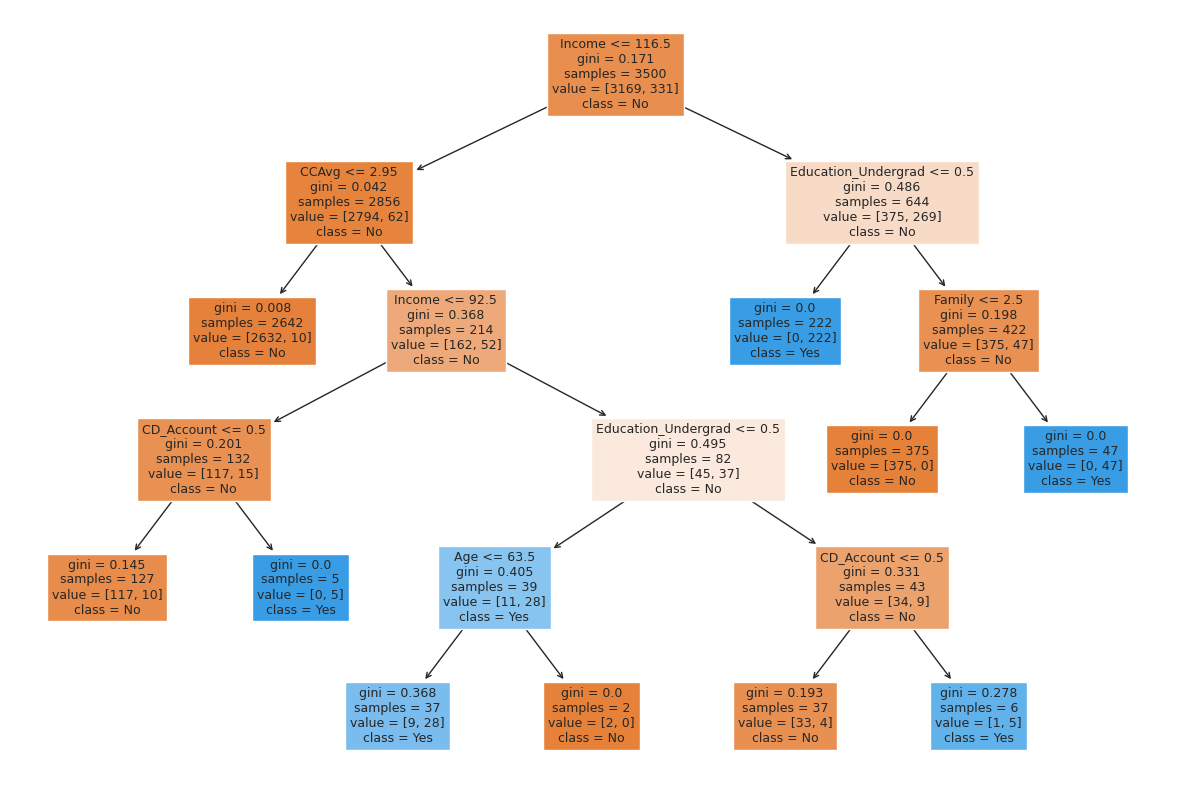

In [97]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model_pre, feature_names=list(X_train.columns), class_names=['No', 'Yes'], filled=True)
plt.show()

In [99]:
print(tree.export_text(dt_model_pre, feature_names=list(X_train.columns)))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- class: 1
|--- Income >  116.50
|   |--- Education_Undergrad <= 0.50
|   |   |--- class: 1
|   |--- Education_Undergrad >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- class: 0
|   |   |--- Family >  2.50
|   |   |   |--- class: 1


In [100]:
# Show feature importance

print(pd.DataFrame(dt_model_pre.feature_importances_, columns=["Importance"], index=X_train.columns).sort_values(by="Importance", ascending=False))

                        Importance
Education_Undergrad       0.446191
Income                    0.327387
Family                    0.155083
CCAvg                     0.042061
CD_Account                0.025243
Age                       0.004035
ZIPCode_91                0.000000
ZIPCode_95                0.000000
ZIPCode_94                0.000000
ZIPCode_93                0.000000
ZIPCode_92                0.000000
CreditCard                0.000000
Education_Professional    0.000000
Online                    0.000000
Securities_Account        0.000000
Mortgage                  0.000000
ZIPCode_96                0.000000


The set of important parameters have not change, although the order has changed a little bit - Age is now deprioritized.

How does this model perform on test data?

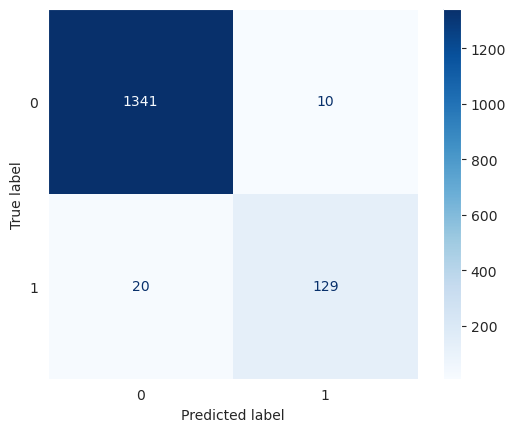

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


In [101]:
ConfusionMatrixDisplay.from_estimator(dt_model_pre, X_test, Y_test, cmap='Blues')
plt.grid(False)
plt.show()

model_performance_classification_sklearn(dt_model_pre, X_test, Y_test)

Not only accuracy, but the recall rate has decreased on test data as well. This is not good. Let us try post-pruning

#### Decision Tree with post-pruning

In [106]:
cost_pruning = DecisionTreeClassifier(random_state=1)
path = cost_pruning.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00021429, 0.00022278, 0.00024156, 0.0002684 ,
       0.00035854, 0.00038095, 0.00038095, 0.00038095, 0.00047619,
       0.00052747, 0.00058203, 0.00059259, 0.00064143, 0.00076921,
       0.00088221, 0.00155164, 0.00233306, 0.00302352, 0.0032938 ,
       0.00647281, 0.02386594, 0.05636497])

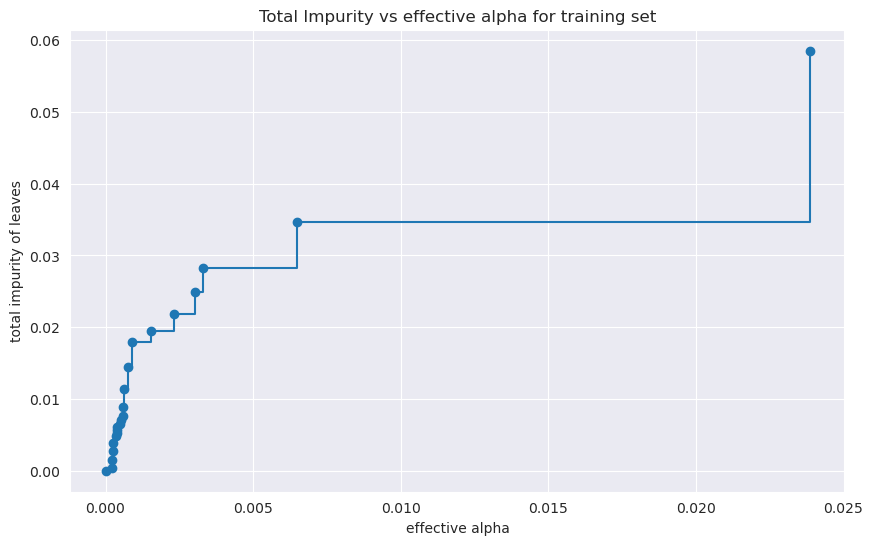

In [107]:
# Let us plot the alpha values against the impurities
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [108]:
# Let us create a list of decision tree models, each with a different alpha value

dt_models = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_model.fit(X_train, Y_train)
    dt_models.append(dt_model)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(dt_models[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


In [ ]:
# Let us remove the last element in dt_models and ccp_alphas, because it is the trivial tree with only one node
dt_models = dt_models[:-1]
ccp_alphas = ccp_alphas[:-1]

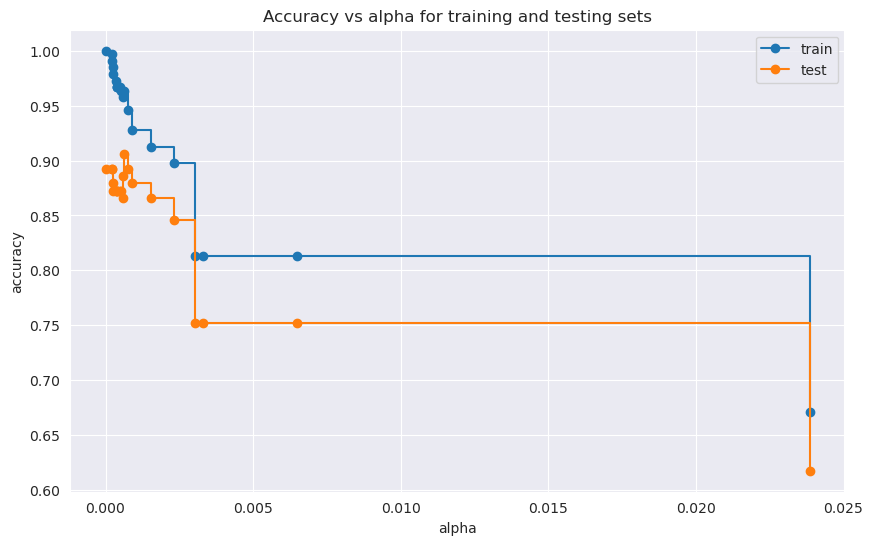

In [113]:
# Let us plot the accuracy of the trees using training data and testing data
train_scores = [recall_score(Y_train, dt_model.predict(X_train)) for dt_model in dt_models]
test_scores = [recall_score(Y_test, dt_model.predict(X_test)) for dt_model in dt_models]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [114]:
# Let us use the best alpha value to create the best decision tree model
best_model = dt_models[test_scores.index(max(test_scores))]
print("Best alpha value is: {}".format(best_model.ccp_alpha))

Best alpha value is: 0.0006414326414326415


Let us see how the best model performs on training data

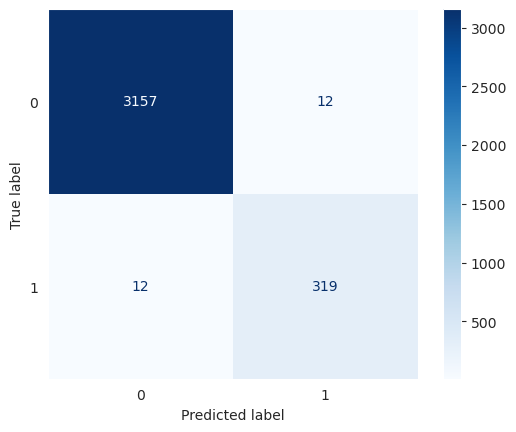

,Accuracy,Recall,Precision,F1
0,0.993143,0.963746,0.963746,0.963746


In [115]:
ConfusionMatrixDisplay.from_estimator(best_model, X_train, Y_train, cmap='Blues')
plt.grid(False)
plt.show()
model_performance_classification_sklearn(best_model, X_train, Y_train)

Visualizing the best fit decision tree

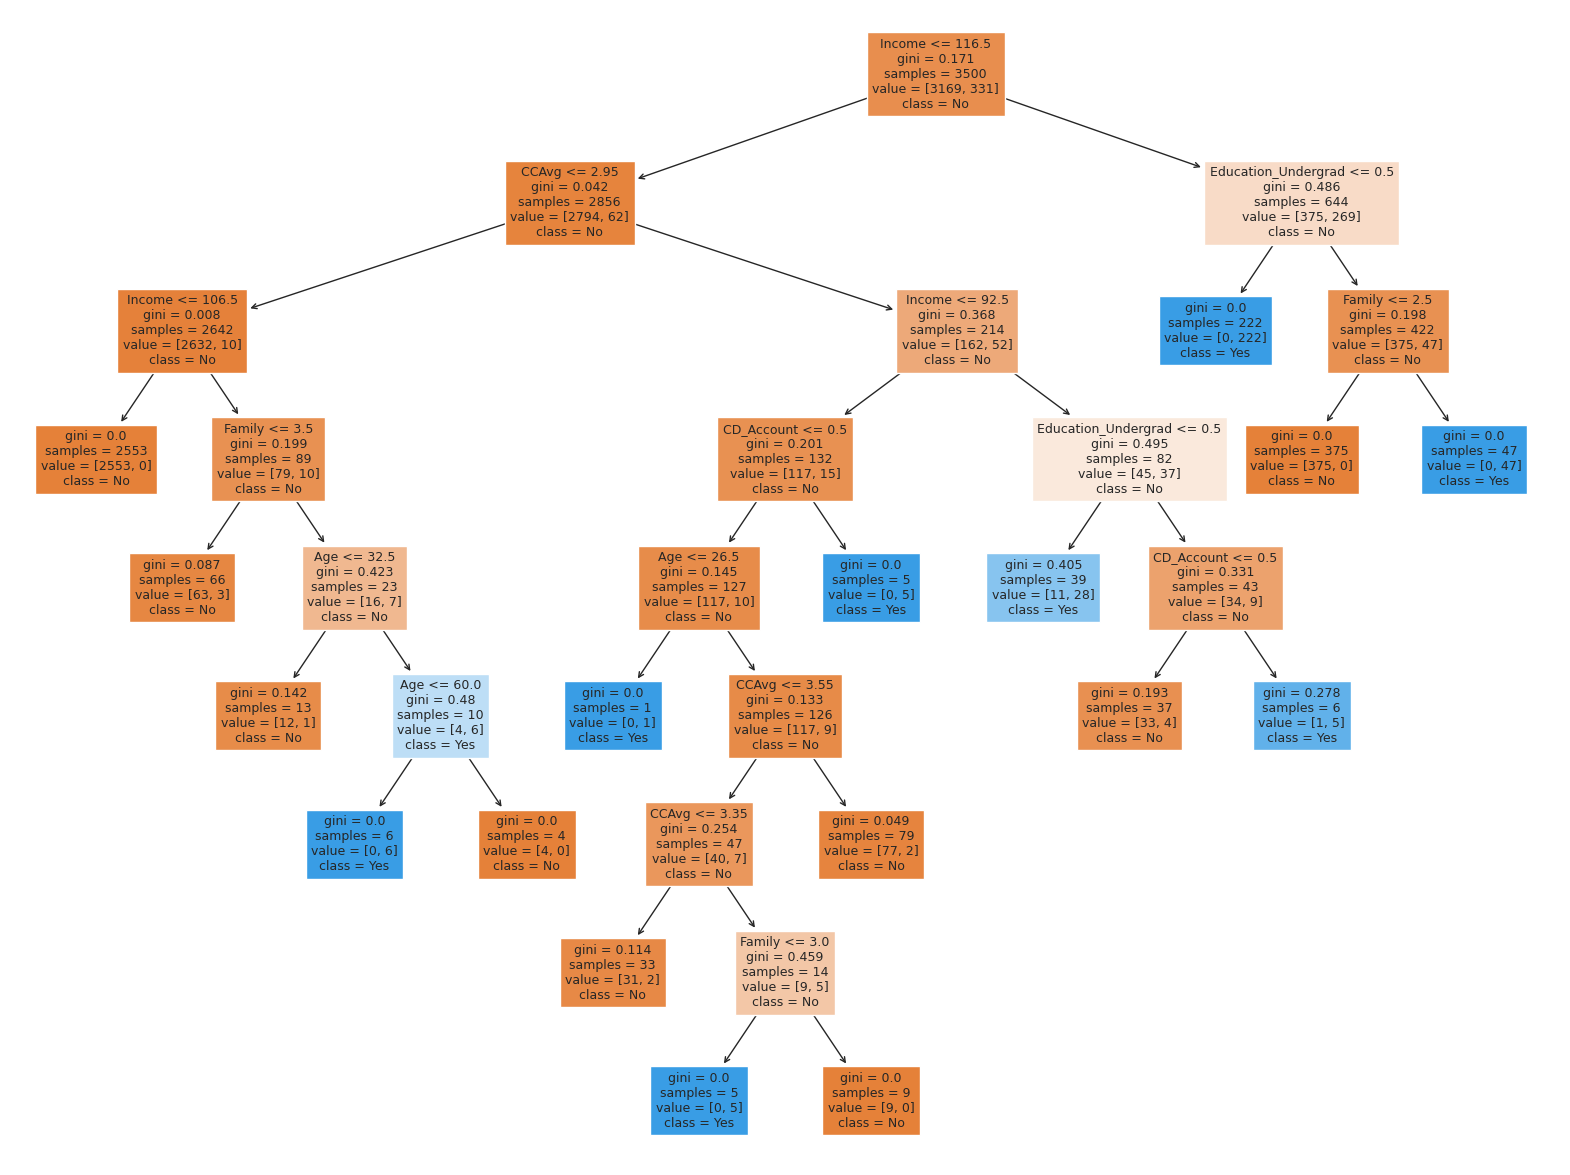

In [119]:
plt.figure(figsize=(20, 15))
tree.plot_tree(best_model, feature_names=list(X_train.columns), class_names=['No', 'Yes'], filled=True, fontsize=9)
plt.show()

In [120]:
print(tree.export_text(best_model, feature_names=list(X_train.columns)))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- CCAvg >  3.35
|   |   |   |   |   |   |   |--- Family <= 3.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Family >  3.00
|   |   |   |   |   | 

In [121]:
# Show feature importance
print(pd.DataFrame(best_model.feature_importances_, columns=["Importance"], index=X_train.columns).sort_values(by="Importance", ascending=False))

                        Importance
Education_Undergrad       0.429489
Income                    0.319013
Family                    0.164852
CCAvg                     0.045185
CD_Account                0.024298
Age                       0.017163
ZIPCode_91                0.000000
ZIPCode_95                0.000000
ZIPCode_94                0.000000
ZIPCode_93                0.000000
ZIPCode_92                0.000000
CreditCard                0.000000
Education_Professional    0.000000
Online                    0.000000
Securities_Account        0.000000
Mortgage                  0.000000
ZIPCode_96                0.000000


Now look at the testing data:

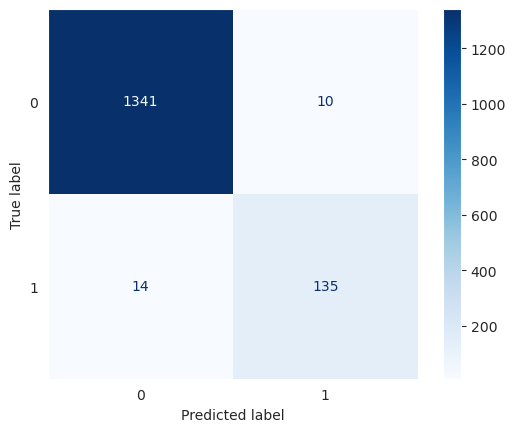

In [122]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, Y_test, cmap='Blues')
plt.grid(False)
plt.show()

In [123]:
model_performance_classification_sklearn(best_model, X_test, Y_test)

,Accuracy,Recall,Precision,F1
0,0.984,0.90604,0.931034,0.918367


The recall rate has improved a little bit, but not by much. However, since this one is trimmed and actually the best recall rate, we will use this model as the final model.

## Model Comparison and Final Model Selection

In [124]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dt_model.T, dt_model_pre.T, best_model.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

AttributeError: 'DecisionTreeClassifier' object has no attribute 'T'

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___